# Artificial Neural Network on mnist Dataset.


<br><li> For building the neural network I'll use **tensorflow**.
<br><li> I'm using the *mnist* dataset from the **keras** library.

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [7]:
import matplotlib.pyplot as plt

In [18]:
from sklearn.metrics import accuracy_score

In [2]:
# now I'll load the data from the keras library
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# now we'll see the shapes of these train and test data.
print("shape of X_train: ", X_train.shape)
print("shape of y_train: ", y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (60000, 28, 28)
shape of y_train:  (60000,)
shape of X_test:  (10000, 28, 28)
shape of y_test:  (10000,)


<li> So, we have images of 70000 handwritten digits.
<li> 60000 training data, 10000 test data.
<li> pictures are of 28 x 28 pixels, i.e., 784 pixels.
<li> So, we have to flatten the inputs.

In [4]:
# X_train looks like-
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
# y_train looks like-
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

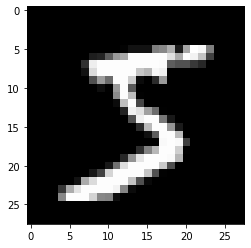

In [9]:
# let's see how a handwritten digit picture looks like-
plt.imshow(X_train[0], cmap= 'gray')

In [10]:
# image label-
y_train[0]

5

In [11]:
# the pixels values are ranging from 0 to 255, we have to map them into 0-1 range.

X_train = X_train / 255
X_test = X_test / 255

In [12]:
# So, the pixel values are now in 0-1 range.
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Building

In [13]:
model = Sequential() # our model will be a sequential model.
# as the inputs are a 2D array (28 x 28) we have to flatten them.
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # as we have 10 class to be identified.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = 'accuracy')

## Model Training

In [16]:
history = model.fit(X_train, y_train, epochs = 20, validation_split= 0.25)

Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.9179 - val_loss: 0.1799 - val_accuracy: 0.9481
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1317 - accuracy: 0.9602 - val_loss: 0.1274 - val_accuracy: 0.9623
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0910 - accuracy: 0.9732 - val_loss: 0.1089 - val_accuracy: 0.9683
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0676 - accuracy: 0.9804 - val_loss: 0.1009 - val_accuracy: 0.9710
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9842 - val_loss: 0.1003 - val_accuracy: 0.9716
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0925 - val_accuracy: 0.9733
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0322 - accuracy: 0.9904 - val_loss: 0.1011 - val_accuracy:

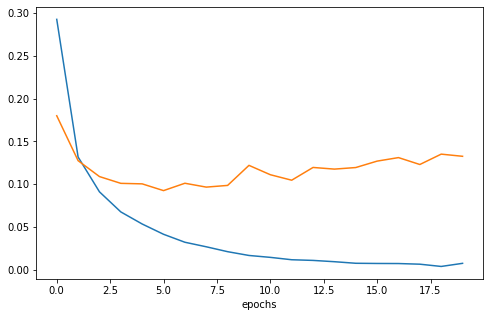

In [21]:
# plotting the change in loss with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

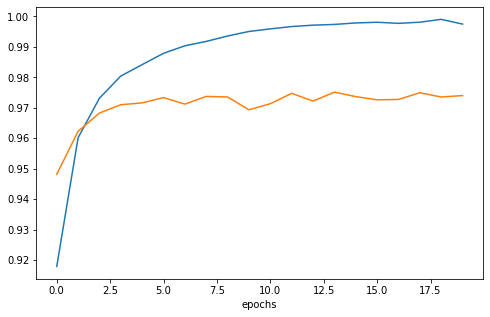

In [22]:
# plotting the change in accuracy with epochs- 
plt.figure(figsize=(8,5))
plt.xlabel('epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Prediction

In [23]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_prob # it shows the probabilties of each class according to the input. So, we have to get the index of the max probability

array([[1.0152397e-11, 1.8607482e-15, 4.1486653e-10, ..., 9.9998790e-01,
        1.8550448e-13, 7.5622737e-11],
       [1.3799827e-15, 1.2300623e-09, 9.9999994e-01, ..., 8.1712216e-26,
        1.2388131e-10, 2.5964352e-23],
       [4.4997633e-14, 9.9999410e-01, 1.2463606e-06, ..., 6.5392783e-07,
        3.6803283e-06, 7.4229529e-12],
       ...,
       [4.0473057e-24, 5.5871868e-19, 1.8242056e-19, ..., 1.4628887e-11,
        2.1302674e-13, 4.8593449e-08],
       [1.5444890e-21, 2.8352703e-22, 6.5067101e-21, ..., 2.1803562e-21,
        3.2364753e-10, 4.0438724e-20],
       [2.3952631e-15, 4.9516842e-22, 4.2362996e-17, ..., 1.5333100e-23,
        1.0502448e-21, 1.9095042e-21]], dtype=float32)

In [25]:
y_pred = y_prob.argmax(axis = 1)

In [26]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

We can see that according to the prediction the first input is number 7. Let's see the first picture from the test set.

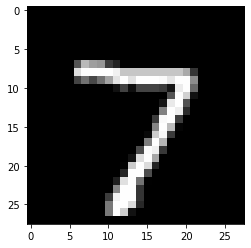

In [27]:
plt.imshow(X_test[0], cmap = 'gray')

It also shows 7. So our this prediction is correct.
<br> Let's check the testing accuracy.

In [28]:
accuracy_score(y_test, y_pred)

0.9769

### We are getting a 97% accuracy with this model!!!